In [3]:
from maelzel.core import *
from maelzel.scoring import logger as sclogger

cfg = getConfig()
cfg['quant.debug'] = False
sclogger.setLevel('DEBUG')

‹4C 4E 1♩ offset=0.5› 1/2 1/2
4D:1♩:gliss=4G None 3/2
4F:0.333♩ None 5/2
4F:0.667♩ None 17/6


Chain([‹4C 4E 1♩ offset=0.5›, 4D:1♩:gliss=4G, Chain([4F:0.333♩, 4F:0.667♩])])
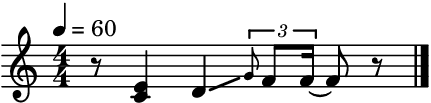

In [5]:
from maelzel.core import *
chain = Chain([
    "4C,4E:1:offset=0.5",
    "4D:1:mf:label=bar:gliss=4g",
     Chain(["4F:1/3", "4F:2/3"])
])

for ev, offset in chain.eventsWithOffset():
    print(ev, ev.offset, offset)

chain

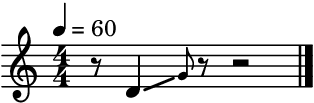

[«0.500:1.500 1/1♩ 4D gliss», «1.500:grace 4G»]
UnquantizedPart #0:
  Measure #0
    Timesig: 4/4 (quarter=60)
    Node ratio: 1/1, offset=0, end=4
      Node ratio: 1/1, offset=0, end=2
        «0.000:0.500 1/2♩ rest»
        «0.500:1.500 1/1♩ 4D gliss»
        «1.500:grace 4G»
        «1.500:2.000 1/2♩ rest»
      Node ratio: 1/1, offset=2, end=4
        «2.000:4.000 2/1♩ rest»


In [6]:
n = Note("4D", dur=1, offset=0.5, gliss="4G")
n.show()
print(n.scoringEvents())
n.quantizedScore().dump()

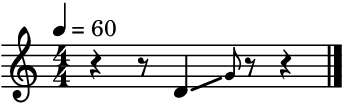

4D:1♩:gliss=4G


In [7]:
n = chain[1]
n.show()
n.dump()
# n.play(start=n.absoluteOffset())


Chain([Rest:0.5♩, ‹4C 4E 1♩›, 4D:1♩:gliss=4G, Chain([4F:0.333♩, 4F:0.667♩])])
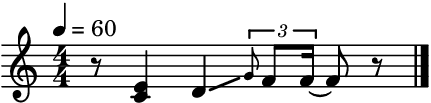

In [8]:

chain.fillGaps()
chain.dump()
chain.removeRedundantOffsets()
# chain.stack()
chain.dump()
chain

Chain([Rest:0.5♩, ‹4C 4E 1♩›, 4D:1♩:gliss=4G, 4F:0.333♩, 4F:0.667♩])
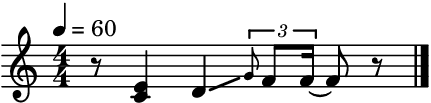

In [9]:
flat = chain.flat()
flat.removeRedundantOffsets()
flat.dump()
flat

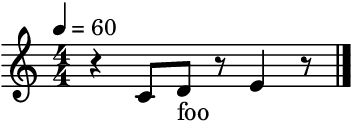

In [10]:
ch = Chain([
    '4C:0.5', 
    '4D:0.5:label=foo', 
    Chain(['4E:1:offset=0.5'])
], offset=0.5)
ch.show()


4C:0.5♩
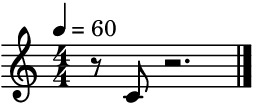

In [11]:
n = ch[0]
n

In [5]:
struct = ScoreStruct(r'''
2/4, 60
2/4, 120
3/4, 72
''')

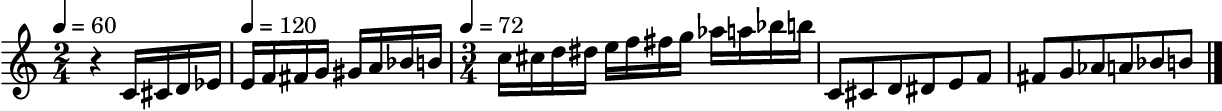

In [13]:
notes = [Note(m, 0.25) for m in range(60, 84)]
sc = Chain(notes, offset=1)
notes2 = [Note(m, 0.5) for m in range(60, 72)]
sc2 = Chain(notes2)
sc.append(sc2)
# sc.stack()
with struct:
    # sc.play()
    sc.asVoice().show()


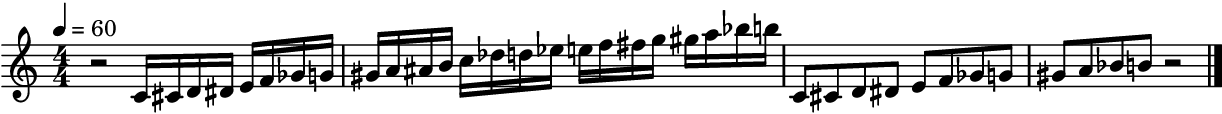

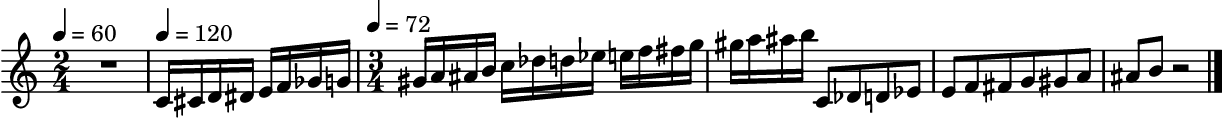

In [14]:
sc.flat().show()
with struct:
    sc.flat().show()

[maelzel.scoring:quant.py:2204 - _mergeSiblings] mergeSiblings: Node(1/1, 
  «0.000:0.250 1/4♩ 4C»
  «0.250:0.500 1/4♩ 4C#»
  «0.500:0.750 1/4♩ 4D»
  «0.750:1.000 1/4♩ 4D#»
) cannot merge with Node(1/1, 
  «1.000:1.250 1/4♩ 4E»
  «1.250:1.500 1/4♩ 4F»
  «1.500:1.750 1/4♩ 4F#»
  «1.750:2.000 1/4♩ 4G»
): no need to extend node over beat
[maelzel.scoring:quant.py:2204 - _mergeSiblings] mergeSiblings: Node(1/1, 
  «0.000:0.250 1/4♩ 4G#»
  «0.250:0.500 1/4♩ 4A»
  «0.500:0.750 1/4♩ 4A#»
  «0.750:1.000 1/4♩ 4B»
) cannot merge with Node(1/1, 
  «1.000:1.250 1/4♩ 5C»
  «1.250:1.500 1/4♩ 5C#»
  «1.500:1.750 1/4♩ 5D»
  «1.750:2.000 1/4♩ 5D#»
): no need to extend node over beat
[maelzel.scoring:quant.py:2204 - _mergeSiblings] mergeSiblings: Node(1/1, 
  «0.000:0.250 1/4♩ 5E»
  «0.250:0.500 1/4♩ 5F»
  «0.500:0.750 1/4♩ 5F#»
  «0.750:1.000 1/4♩ 5G»
) cannot merge with Node(1/1, 
  «1.000:1.250 1/4♩ 5G#»
  «1.250:1.500 1/4♩ 5A»
  «1.500:1.750 1/4♩ 5A#»
  «1.750:2.000 1/4♩ 5B»
): no need to extend nod

Score(4 voices)
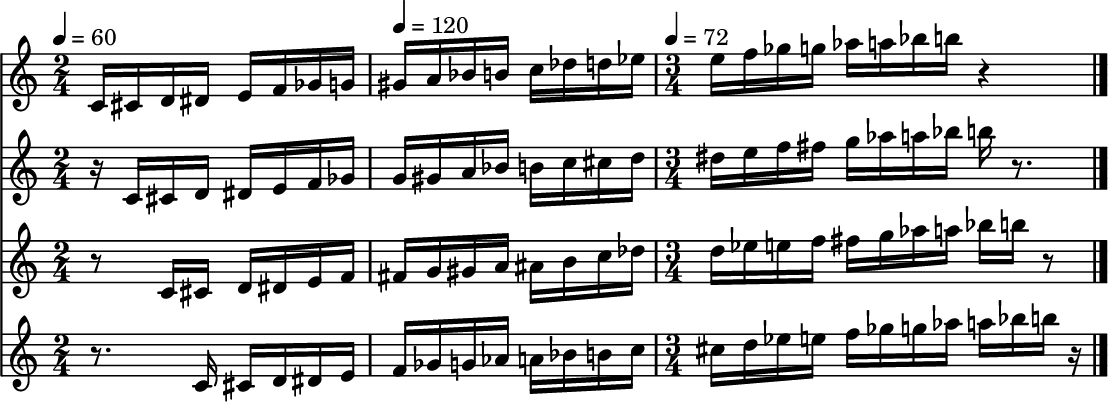

In [6]:
sco = Score(scorestruct=struct)

notes = [Note(m, 0.25) for m in range(60, 84)]
scale = Chain(notes)
sco.append(scale.asVoice())
sco.append(scale.asVoice().timeShift(0.25))
sco.append(scale.asVoice().timeShift(1/2))
sco.append(scale.asVoice().timeShift(3/4))
sco

Score(4 voices)
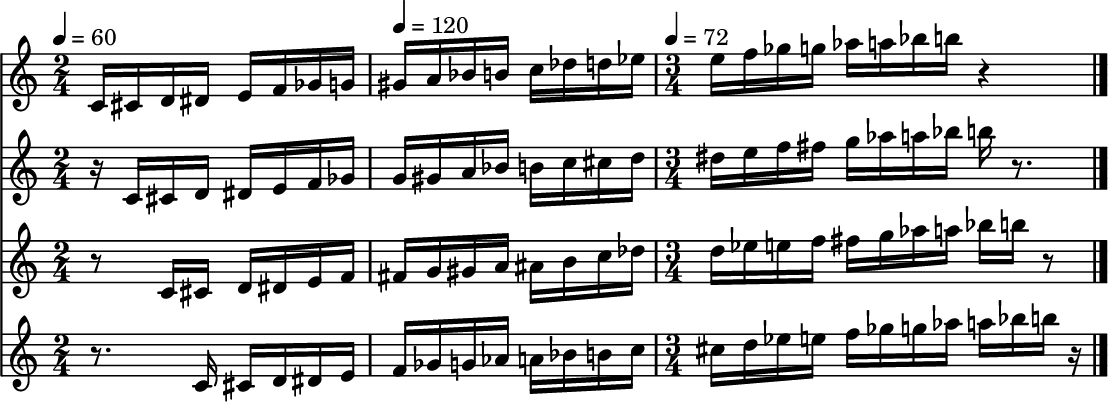

In [7]:
sco[0][0].setPlay(instr='saw', gain=0.1, position=0)
sco[0][3].setPlay(instr='saw', gain=0.1, position=1)
sco.setPlay(position=0.5)

[maelzel.scoring:quant.py:2204 - _mergeSiblings] mergeSiblings: Node(1/1, 
  «0.000:0.250 1/4♩ 4C»
  «0.250:0.500 1/4♩ 4C#»
  «0.500:0.750 1/4♩ 4D»
  «0.750:1.000 1/4♩ 4D#»
) cannot merge with Node(1/1, 
  «1.000:1.250 1/4♩ 4E»
  «1.250:1.500 1/4♩ 4F»
  «1.500:1.750 1/4♩ 4F#»
  «1.750:2.000 1/4♩ 4G»
): no need to extend node over beat
[maelzel.scoring:quant.py:2204 - _mergeSiblings] mergeSiblings: Node(1/1, 
  «0.000:0.250 1/4♩ 4G#»
  «0.250:0.500 1/4♩ 4A»
  «0.500:0.750 1/4♩ 4A#»
  «0.750:1.000 1/4♩ 4B»
) cannot merge with Node(1/1, 
  «1.000:1.250 1/4♩ 5C»
  «1.250:1.500 1/4♩ 5C#»
  «1.500:1.750 1/4♩ 5D»
  «1.750:2.000 1/4♩ 5D#»
): no need to extend node over beat
[maelzel.scoring:quant.py:2204 - _mergeSiblings] mergeSiblings: Node(1/1, 
  «0.000:0.250 1/4♩ 5E»
  «0.250:0.500 1/4♩ 5F»
  «0.500:0.750 1/4♩ 5F#»
  «0.750:1.000 1/4♩ 5G»
) cannot merge with Node(1/1, 
  «1.000:1.250 1/4♩ 5G#»
  «1.250:1.500 1/4♩ 5A»
  «1.500:1.750 1/4♩ 5A#»
  «1.750:2.000 1/4♩ 5B»
): no need to extend nod

Voice([4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, …], offset=0)
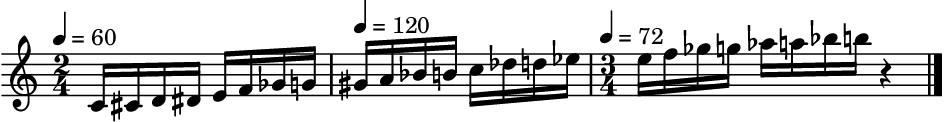

In [8]:
sco[0][0].parent

In [11]:
sco.play(gain=0.2, sustain=0.1)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset:saw:501.0006, p4=0 idataidx_:5=19 inumbps:6=3 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kcutoffratio:17=0 kfilterq:18=3 p19=0 p20=60 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset:sin:502.019, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=61 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset:sin:502.0191, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=62 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset:saw:501.0007, p4=0 idataidx_:5=19 inumbps:6=3 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kcutoffratio:17=0 kfilterq:18=3 p19=0 p20=63 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset:sin:502.0192, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=64 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset:sin:502.0193, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=65 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset:sin:502.0194, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=66 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset:sin:502.0195, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset:sin:502.0196, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=68 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0197, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=69 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0198, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=70 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0199, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=71 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.02, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=72 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0201, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=73 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0202, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=74 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0203, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=75 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset:sin:502.0204, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan: